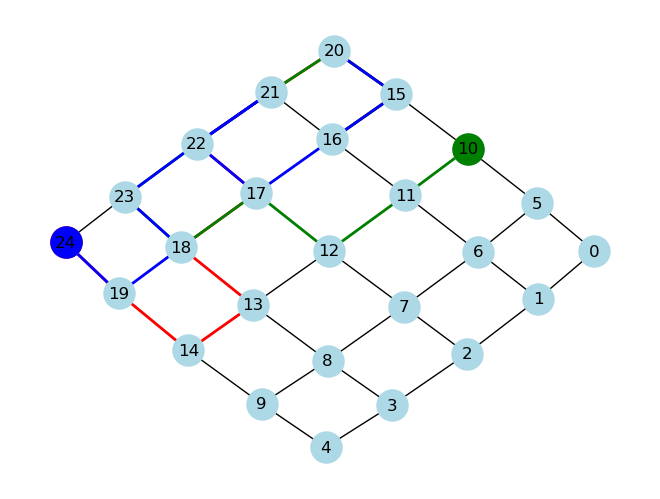

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import random

class Agent:
    def __init__(self, id, start_node):
        self.id = id
        self.current_node = start_node
        self.path = [start_node]

    def move(self, next_node):
        self.current_node = next_node
        self.path.append(next_node)

class CentralizedController:
    def __init__(self, graph):
        self.graph = graph
        self.agents = []

    def add_agent(self, agent):
        self.agents.append(agent)

    def get_next_node(self, agent):
        neighbors = list(self.graph.neighbors(agent.current_node))
        unvisited_neighbors = [n for n in neighbors if n not in agent.path]
        if unvisited_neighbors:
            return random.choice(unvisited_neighbors)
        else:
            return random.choice(neighbors)

    def step(self):
        for agent in self.agents:
            next_node = self.get_next_node(agent)
            agent.move(next_node)

    def run(self, steps):
        for _ in range(steps):
            self.step()

def create_graph():
    G = nx.grid_2d_graph(5, 5)
    mapping = {(i, j): i * 5 + j for i, j in G.nodes()}
    G = nx.relabel_nodes(G, mapping)
    return G

def draw_graph(G, agents):
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500)
    colors = ['red', 'green', 'blue', 'orange', 'purple']
    for i, agent in enumerate(agents):
        path_edges = [(agent.path[j], agent.path[j+1]) for j in range(len(agent.path)-1)]
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color=colors[i % len(colors)], width=2)
        nx.draw_networkx_nodes(G, pos, nodelist=[agent.current_node], node_color=colors[i % len(colors)], node_size=500)
    plt.show()

# 创建图
graph = create_graph()

# 创建集中式控制器
controller = CentralizedController(graph)

# 创建并添加智能体
agents = [Agent(id=i, start_node=random.choice(list(graph.nodes()))) for i in range(3)]
for agent in agents:
    controller.add_agent(agent)

# 运行智能体
controller.run(10)

# 绘制图形和智能体路径
draw_graph(graph, agents)



Step 1:
Agent 0 is at node 13 with path: [14, 13]
Agent 1 is at node 6 with path: [6]
Agent 2 is at node 20 with path: [20]
Agent 0 is at node 13 with path: [14, 13]
Agent 1 is at node 11 with path: [6, 11]
Agent 2 is at node 20 with path: [20]
Agent 0 is at node 13 with path: [14, 13]
Agent 1 is at node 11 with path: [6, 11]
Agent 2 is at node 21 with path: [20, 21]

Step 2:
Agent 0 is at node 18 with path: [14, 13, 18]
Agent 1 is at node 11 with path: [6, 11]
Agent 2 is at node 21 with path: [20, 21]
Agent 0 is at node 18 with path: [14, 13, 18]
Agent 1 is at node 16 with path: [6, 11, 16]
Agent 2 is at node 21 with path: [20, 21]
Agent 0 is at node 18 with path: [14, 13, 18]
Agent 1 is at node 16 with path: [6, 11, 16]
Agent 2 is at node 16 with path: [20, 21, 16]

Step 3:
Agent 0 is at node 23 with path: [14, 13, 18, 23]
Agent 1 is at node 16 with path: [6, 11, 16]
Agent 2 is at node 16 with path: [20, 21, 16]
Agent 0 is at node 23 with path: [14, 13, 18, 23]
Agent 1 is at node 21

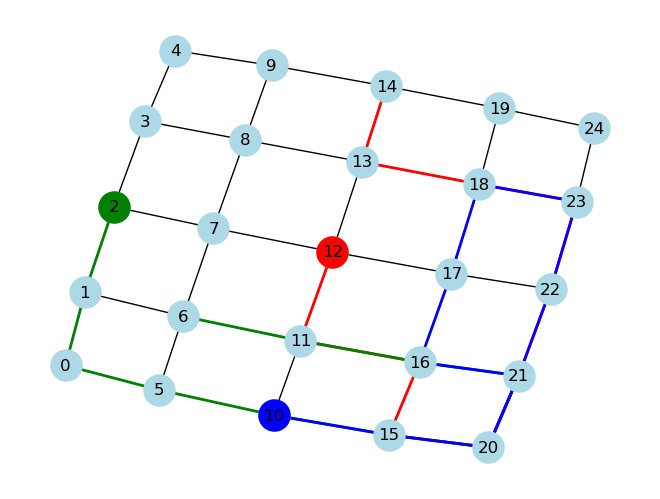

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import random

class Agent:
    def __init__(self, id, start_node):
        self.id = id
        self.current_node = start_node
        self.path = [start_node]

    def move(self, next_node):
        self.current_node = next_node
        self.path.append(next_node)

class CentralizedController:
    def __init__(self, graph):
        self.graph = graph
        self.agents = []

    def add_agent(self, agent):
        self.agents.append(agent)

    def get_next_node(self, agent):
        neighbors = list(self.graph.neighbors(agent.current_node))
        unvisited_neighbors = [n for n in neighbors if n not in agent.path]
        if unvisited_neighbors:
            return random.choice(unvisited_neighbors)
        else:
            return random.choice(neighbors)

    def step(self):
        for agent in self.agents:
            next_node = self.get_next_node(agent)
            agent.move(next_node)
            self.print_status()

    def run(self, steps):
        for step in range(steps):
            print(f"\nStep {step + 1}:")
            self.step()

    def print_status(self):
        for agent in self.agents:
            print(f"Agent {agent.id} is at node {agent.current_node} with path: {agent.path}")

def create_graph():
    G = nx.grid_2d_graph(5, 5)
    mapping = {(i, j): i * 5 + j for i, j in G.nodes()}
    G = nx.relabel_nodes(G, mapping)
    return G

def draw_graph(G, agents):
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500)
    colors = ['red', 'green', 'blue', 'orange', 'purple']
    for i, agent in enumerate(agents):
        path_edges = [(agent.path[j], agent.path[j+1]) for j in range(len(agent.path)-1)]
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color=colors[i % len(colors)], width=2)
        nx.draw_networkx_nodes(G, pos, nodelist=[agent.current_node], node_color=colors[i % len(colors)], node_size=500)
    plt.show()

# 创建图
graph = create_graph()

# 创建集中式控制器
controller = CentralizedController(graph)

# 创建并添加智能体
agents = [Agent(id=i, start_node=random.choice(list(graph.nodes()))) for i in range(3)]
for agent in agents:
    controller.add_agent(agent)

# 运行智能体
controller.run(10)

# 绘制图形和智能体路径
draw_graph(graph, agents)


In [8]:
import numpy as np

class GomokuEnv:
    def __init__(self, board_size=5):
        self.board_size = board_size
        self.reset()

    def reset(self):
        self.board = np.zeros((self.board_size, self.board_size), dtype=int)
        self.current_player = 1
        return self.board.flatten()

    def step(self, action):
        row, col = divmod(action, self.board_size)
        if self.board[row, col] != 0:
            return self.board.flatten(), -10, True, {}  # illegal move penalty

        self.board[row, col] = self.current_player
        if self.check_win(row, col):
            return self.board.flatten(), 10, True, {}  # win reward

        if np.all(self.board != 0):
            return self.board.flatten(), 0, True, {}  # draw

        self.current_player = 3 - self.current_player  # switch player
        return self.board.flatten(), 0, False, {}

    def check_win(self, row, col):
        player = self.board[row, col]
        directions = [(1, 0), (0, 1), (1, 1), (1, -1)]
        for dr, dc in directions:
            count = 1
            for i in range(1, 5):
                r, c = row + dr * i, col + dc * i
                if 0 <= r < self.board_size and 0 <= c < self.board_size and self.board[r, c] == player:
                    count += 1
                else:
                    break
            for i in range(1, 5):
                r, c = row - dr * i, col - dc * i
                if 0 <= r < self.board_size and 0 <= c < self.board_size and self.board[r, c] == player:
                    count += 1
                else:
                    break
            if count >= 5:
                return True
        return False

    def available_actions(self):
        return [i for i in range(self.board_size * self.board_size) if self.board.flat[i] == 0]


In [9]:
class QLearningAgent:
    def __init__(self, state_size, action_size, learning_rate=0.1, discount_factor=0.9, exploration_rate=1.0, exploration_decay=0.995):
        self.state_size = state_size
        self.action_size = action_size
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.exploration_rate = exploration_rate
        self.exploration_decay = exploration_decay
        self.q_table = {}

    def get_state(self, board):
        return tuple(board)

    def choose_action(self, state, available_actions):
        if np.random.rand() < self.exploration_rate:
            return np.random.choice(available_actions)
        if state not in self.q_table:
            self.q_table[state] = np.zeros(self.action_size)
        return available_actions[np.argmax([self.q_table[state][a] for a in available_actions])]

    def learn(self, state, action, reward, next_state, done):
        if state not in self.q_table:
            self.q_table[state] = np.zeros(self.action_size)
        if next_state not in self.q_table:
            self.q_table[next_state] = np.zeros(self.action_size)
        q_predict = self.q_table[state][action]
        q_target = reward + self.discount_factor * np.max(self.q_table[next_state]) * (1 - done)
        self.q_table[state][action] += self.learning_rate * (q_target - q_predict)

    def update_exploration_rate(self):
        self.exploration_rate *= self.exploration_decay


In [10]:
def train_gomoku():
    board_size = 5
    env = GomokuEnv(board_size)
    agent = QLearningAgent(state_size=board_size * board_size, action_size=board_size * board_size)
    
    num_episodes = 1000
    max_steps_per_episode = board_size * board_size

    for episode in range(num_episodes):
        state = env.reset()
        done = False
        while not done:
            available_actions = env.available_actions()
            action = agent.choose_action(agent.get_state(state), available_actions)
            next_state, reward, done, _ = env.step(action)
            agent.learn(agent.get_state(state), action, reward, agent.get_state(next_state), done)
            state = next_state
        agent.update_exploration_rate()

    return agent, env

def test_gomoku(agent, env):
    state = env.reset()
    done = False
    while not done:
        available_actions = env.available_actions()
        action = agent.choose_action(agent.get_state(state), available_actions)
        state, reward, done, _ = env.step(action)
        print(env.board)
        print()

agent, env = train_gomoku()
test_gomoku(agent, env)


[[1 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]

[[1 2 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]

[[1 2 1 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]

[[1 2 1 2 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]

[[1 2 1 2 1]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]

[[1 2 1 2 1]
 [2 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]

[[1 2 1 2 1]
 [2 1 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]

[[1 2 1 2 1]
 [2 1 2 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]

[[1 2 1 2 1]
 [2 1 2 1 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]

[[1 2 1 2 1]
 [2 1 2 1 2]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]

[[1 2 1 2 1]
 [2 1 2 1 2]
 [1 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]

[[1 2 1 2 1]
 [2 1 2 1 2]
 [1 2 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]

[[1 2 1 2 1]
 [2 1 2 1 2]
 [1 2 1 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]

[[1 2 1 2 1]
 [2 1 2 1 2]
 [1 2 1 2 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]

[[1 2 1 2 1]
 [2 1 2 1 2]
 [1 2 1 2 1]
 [0 0 0 0 0]
 [0 0 0 0 